In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import os

from statistics import mean

import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.datasets import fetch_20newsgroups

In [3]:
categories = [
 'comp.graphics',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'talk.politics.misc',
 'talk.religion.misc']

In [36]:
train_data = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)
train_y = train_data.target

test_data = fetch_20newsgroups(
    subset='test', 
    categories=categories, 
    shuffle=True, 
    random_state=42
)
test_y = test_data.target

print(f"There are {len(train_data.data)} news for training")
print(f"There are {len(test_data.data)} news for testing")

There are 5578 news for training
There are 3714 news for testing


In [37]:
def adjust_data(data):
    """
    function to run in each string of the data set and apply the cleaning 
    
    Args:
        temp (string): variable to hold the values on each string while cleaning the dataset

    Returns:
        data (list of string) - lists containing the data cleaned
    """
    
    for i in range(len(data)):
        temp = data[i]
        temp = temp.split('\n')
        #removing the 'from' headline
        temp  = temp[1:]

        #removing empty indexes
        temp = [x for x in temp if x != '']

        #removing not alphabetical chars
        temp = [re.sub(r'/^[\w&.\-]+$/',' ',i) for i in temp]

        #removing the string that appear in every sentence
        temp = [x.replace('Subject: ','') for x in temp]

        temp = [x.replace('Re: ','') for x in temp]
    
        data[i] = ' '.join(temp)
    
    return data

In [38]:
train_x = adjust_data(train_data.data)
test_x = adjust_data(test_data.data)

# Categories Study

In [53]:
def create_text_dict(x,y,categories=categories):
    text_dicts = {}
    
    for id,i in enumerate(y):

        label = categories[i]

        if not label in text_dicts.keys():
            text_dicts[label]=[]
        
        text_dicts[label].append(x[id])

    return text_dicts

In [ ]:
text_dict = create_text_dict(train_x,train_y)

## Number of texts in each categorie

In [81]:
def get_total(dict_):
    total_list = []
    for i in dict_.keys():
        temp = len(dict_[i])
        total_list.append(np.round(temp))
    
    return total_list

In [84]:
fig = px.bar(x=get_total(text_dict), y=text_dict.keys(),text_auto='.2s',
                 width=1000, height=600)

fig.update_layout(
    title={
        'text': "Number of texts for each categorie",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Number of texts",
    yaxis_title="Categories",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="Black"
    ))

fig.show()

## Most common words

To better undestand the differences between the categories, we need to understand the most common word in each categories, it says a lot on what subject it's about, for example, an automobile news problaby the word car it's the most common, and for religious new, the word God. 

comp.graphics


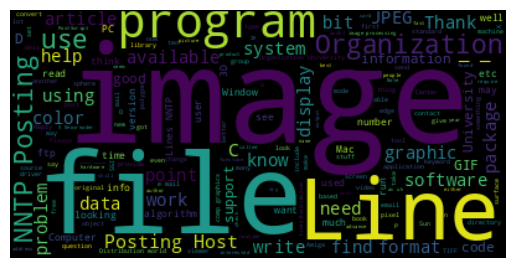

misc.forsale


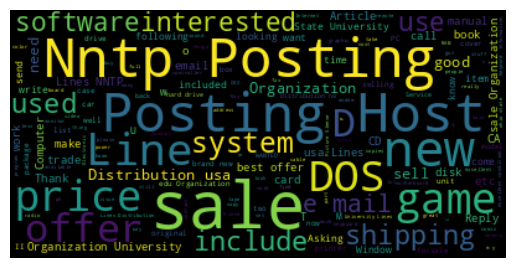

rec.autos


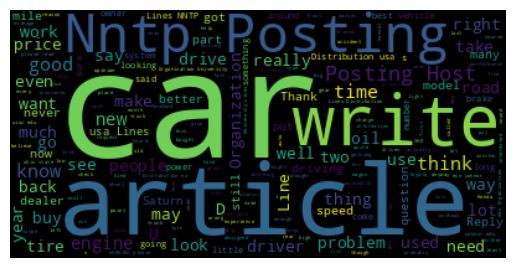

rec.motorcycles


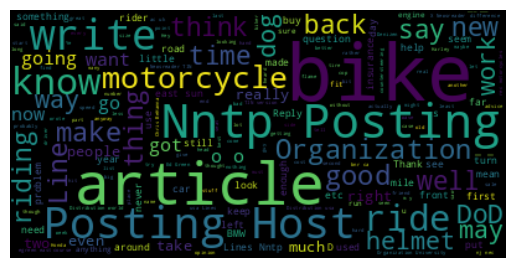

rec.sport.baseball


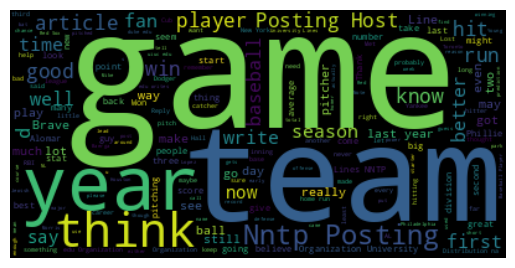

sci.electronics


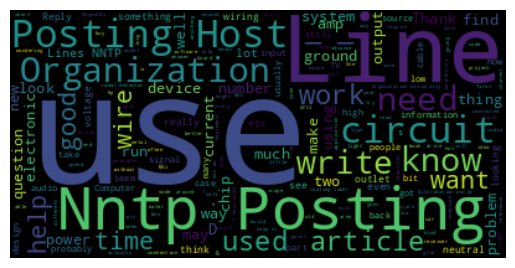

sci.med


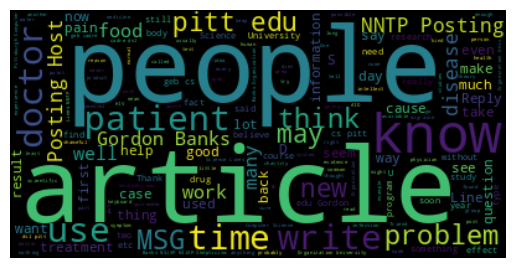

sci.space


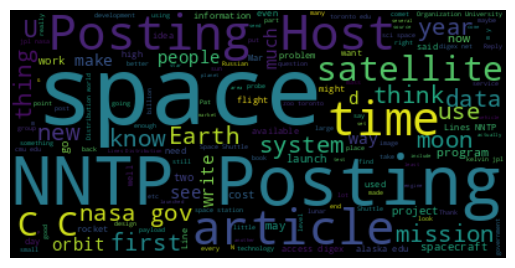

talk.politics.misc


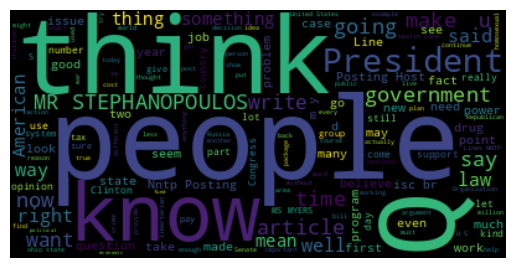

talk.religion.misc


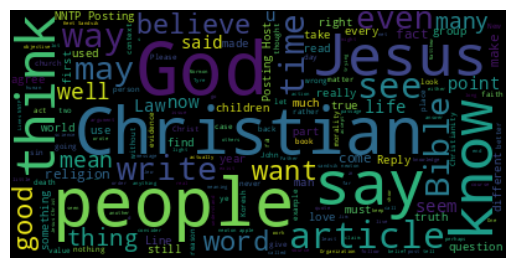

In [54]:
count = 0
for label in categories:
    text = ' '.join(text_dict[label])

    #The words 'one' and 'will' is reapeated too 
    # much and don't aggragate on the analysis
    text = text.replace('one',' ')
    text = text.replace('will',' ')

    wordcloud = WordCloud().generate(text)
    print(label)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

As we can see, there are word that as specific for a type of news, differentiating it from the rest

## Mean word count for categories sentences

In [65]:
def get_mean(dict_):
    mean_list = []
    for i in dict_.keys():
        temp = mean([len(s.split()) for s in dict_[i]])
        mean_list.append(np.round(temp))
    
    return mean_list

In [79]:
fig = px.bar(x=get_mean(text_dict), y=text_dict.keys(),text_auto='.2s',
                 width=1000, height=600)

fig.update_layout(
    title={
        'text': "Mean of word in each categorie",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Mean of words",
    yaxis_title="Categories",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="Black"
    ))

fig.show()

As we can see, there are a good diferrence between the word counts, that's a good signal that this groups are very apart for each other, making the prediction of a new text more possible